# Naive Baye's Classifier
It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
### Baye's Theorem :
<code>P(A|B)=P(B|A)*P(A)/P(B)</code>
 <br>P(A|B) => probability of event A given that event B has already accured 
1. P(A|B) is the posterior probability of class (A, target) given predictor (B, attributes).
2. P(A) is the prior probability of class.
3. P(B|A) is the likelihood which is the probability of predictor given class.
4. P(B) is the prior probability of predictor.(marginal probability)
**Also** : P(A|B)*P(B)=P(A&B)
### There are 3 types of Naive Bayes Classifiers :
1. **Bernoulli Naive Bayes** : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

2. **Multinomial Naive Bayes** : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

3. **Gaussian Naive Bayes** : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.
#### Cons:
1. If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
2. Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

<br>link : https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

In [1]:
import pandas as pd
import numpy as na
import matplotlib.pyplot as plt
import seaborn as sns

### Gaussian Naive Bayes

In [2]:
df=pd.read_csv('C:/Users/vikash arya/datascience/datascience_krishnaik/data_sets/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df=df.sample(frac=1)
df=df.reset_index()
df.drop('index',axis=1,inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,4.0,1.2,0.2,Iris-setosa
1,6.8,3.0,5.5,2.1,Iris-virginica
2,6.7,3.3,5.7,2.5,Iris-virginica
3,4.7,3.2,1.6,0.2,Iris-setosa
4,5.4,3.4,1.5,0.4,Iris-setosa


In [5]:
l=[]
for i in df.species:
    if i=='Iris-setosa':
        l.append(0)
    elif i=='Iris-virginica':
        l.append(2)
    else:
        l.append(1)
df['species_num']=l
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.8,4.0,1.2,0.2,Iris-setosa,0
1,6.8,3.0,5.5,2.1,Iris-virginica,2
2,6.7,3.3,5.7,2.5,Iris-virginica,2
3,4.7,3.2,1.6,0.2,Iris-setosa,0
4,5.4,3.4,1.5,0.4,Iris-setosa,0


In [6]:
x=df.iloc[:,:-2]
y=df['species_num']
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.naive_bayes import GaussianNB 
gnb=GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('R^2 : ',gnb.score(x_test,y_test))

R^2 :  0.9666666666666667


In [10]:
y_pred=gnb.predict(x_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred))
print('-------------------------------------------------')
print('Classification Report','\n','****'.center(70,'-'),'\n',classification_report(y_test,y_pred),'****'.center(70,'-'))
print('Confusion Matrix','\n','****'.center(70,'-'),'\n',confusion_matrix(y_test,y_pred))

Accuracy Score :  0.9666666666666667
-------------------------------------------------
Classification Report 
 ---------------------------------****--------------------------------- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30
 ---------------------------------****---------------------------------
Confusion Matrix 
 ---------------------------------****--------------------------------- 
 [[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]


## Multinomial naive bayes
spam email detection

In [36]:
data=pd.read_csv('C:/Users/vikash arya/datascience/datascience_krishnaik/data_sets/spam_ham_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [37]:
# drop unnamed :0 and label column 
data.drop(['Unnamed: 0','label'],axis=1,inplace=True)
# import count vectorizer to convert all uniqe character's count
#Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(data['text'])


In [38]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,data['label_num'])

In [40]:
print('number of features in x',len(vectorizer.get_feature_names()),'\n','-'.center(50,'-'))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


number of features in x 50447 
 --------------------------------------------------
(3878, 50447) (1293, 50447) (3878,) (1293,)


In [41]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [42]:
mnb.predict(x_train)

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score,classification_report
mnb.score(x_test,y_test)

0.9853054911059551

In [45]:
y_pred=mnb.predict(x_test)
print('Accuracy score : ',accuracy_score(y_test,y_pred),'\n')
print('classification report','\n',classification_report(y_test,y_pred))

Accuracy score :  0.9853054911059551 

classification report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       917
           1       0.98      0.97      0.97       376

    accuracy                           0.99      1293
   macro avg       0.98      0.98      0.98      1293
weighted avg       0.99      0.99      0.99      1293



(array([918.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 375.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

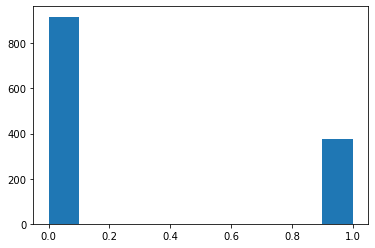

In [49]:
plt.hist(y_pred)

## Bernoulli Naive Bayes
used when our features follow bernoulli distribution<br>
Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

In [56]:
dt=pd.read_csv('C:/Users/vikash arya/datascience/datascience_krishnaik/data_sets/spambase/train_data.csv')
dt.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.00,14.28,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,1.800,5,9,True,1947
1,0.00,0.00,1.00,0.0,0.50,0.00,0.00,0.00,0.0,0.50,...,0.357,0.000,0.892,0.000,0.000,2.000,19,172,False,2159
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.29,0.0,0.43,...,0.124,0.000,0.310,0.062,0.000,1.477,8,65,False,4223
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.444,0.000,0.000,2.800,7,28,True,2624
4,0.00,0.00,0.00,0.0,1.17,0.00,0.00,0.00,0.0,1.17,...,0.000,0.000,0.000,0.000,0.000,1.551,10,45,True,2743
5,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.022,0.019,0.022,0.022,0.022,3.482,5,5902,True,3451
6,0.00,0.00,0.37,0.0,0.00,0.00,0.37,0.00,0.0,0.00,...,0.302,0.000,0.241,0.060,0.000,2.166,18,143,False,464
7,0.00,3.03,0.00,0.0,0.00,0.00,0.00,0.00,0.0,3.03,...,0.000,0.000,0.000,0.000,0.000,2.769,21,36,True,3219
8,0.09,0.00,0.48,0.0,0.00,0.29,0.00,0.00,0.0,0.09,...,0.030,0.000,0.000,0.046,0.000,1.722,17,267,True,3007
9,0.00,0.00,0.66,0.0,0.00,0.66,0.00,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,1.142,4,56,True,1549


In [61]:
x=dt.iloc[:,:-5]
y=dt.ham
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [63]:
bnb.score(x_test,y_test)

0.8940217391304348

In [64]:
y_pred=bnb.predict(x_test)
print('Accuracy score : ',accuracy_score(y_test,y_pred),'\n')
print('classification report','\n',classification_report(y_test,y_pred))

Accuracy score :  0.8940217391304348 

classification report 
               precision    recall  f1-score   support

       False       0.88      0.85      0.86       288
        True       0.91      0.92      0.91       448

    accuracy                           0.89       736
   macro avg       0.89      0.89      0.89       736
weighted avg       0.89      0.89      0.89       736

